# Elina Harutyunyan
# PSET 2
# Problem 3

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statistics as stat
from scipy import stats
import seaborn as sns
import math as math

In [2]:
mktrf = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/mkt_rf.csv")
inds = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/30ind_ports.csv")

In [3]:
mktrf.head()

,Date,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.30,-2.87,0.22
1,192608,2.64,-1.40,4.19,0.25
2,192609,0.36,-1.32,0.01,0.23
3,192610,-3.24,0.04,0.51,0.32
4,192611,2.53,-0.20,-0.35,0.31


In [4]:
inds.head()

,Data,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,192607,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,...,0.83,9.22,2.06,7.70,1.93,-23.79,0.07,1.87,0.37,5.20
1,192608,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,...,2.17,2.02,4.39,-2.38,4.88,5.39,-0.75,-0.13,4.46,6.76
2,192609,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,...,2.41,2.25,0.19,-5.54,0.05,-7.87,0.25,-0.56,-1.23,-3.86
3,192610,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,...,-0.11,-2.00,-1.09,-5.08,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49
4,192611,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,...,1.63,3.77,3.64,3.84,1.60,4.67,6.52,4.33,2.24,4.00


In [5]:
mktrf.Date = pd.to_datetime(mktrf.Date, format = '%Y%m',errors = 'ignore')
inds.Data = pd.to_datetime(inds.Data,format = '%Y%m',errors = 'ignore')
mktrf.set_index('Date',inplace = True)
inds.set_index('Data',inplace = True)

In [6]:
mktrf.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,2.96,-2.30,-2.87,0.22
1926-08-01,2.64,-1.40,4.19,0.25
1926-09-01,0.36,-1.32,0.01,0.23
1926-10-01,-3.24,0.04,0.51,0.32
1926-11-01,2.53,-0.20,-0.35,0.31


In [7]:
inds.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Data,,,,,,,,,,,,,,,,,,,,,
1926-07-01,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,0.83,9.22,2.06,7.70,1.93,-23.79,0.07,1.87,0.37,5.20
1926-08-01,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,2.17,2.02,4.39,-2.38,4.88,5.39,-0.75,-0.13,4.46,6.76
1926-09-01,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,2.41,2.25,0.19,-5.54,0.05,-7.87,0.25,-0.56,-1.23,-3.86
1926-10-01,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-0.11,-2.00,-1.09,-5.08,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49
1926-11-01,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,1.63,3.77,3.64,3.84,1.60,4.67,6.52,4.33,2.24,4.00


In [8]:
#cutting the sample
mktrf, inds = mktrf["1971-01-01":"2019-12-01"], inds["1971-01-01":"2019-12-01"]

In [9]:
#calculating excess returns
inds_ex = inds.apply(lambda x: x - mktrf['RF'], axis=0)

In [10]:
#getting industry alphas and betas
mkt_reg_alphas = []
mkt_reg_betas = []
for column in inds:
    mkt_reg_alphas.append(sm.OLS(inds_ex[column],sm.add_constant(mktrf["Mkt-RF"])).fit().params[0])
    mkt_reg_betas.append(sm.OLS(inds_ex[column],sm.add_constant(mktrf["Mkt-RF"])).fit().params[1])

/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
ind_names = list(inds_ex.columns)

In [12]:
coefs = pd.DataFrame(
{'Industry' : ind_names,
'alpha' : mkt_reg_alphas,
'beta' : mkt_reg_betas})

In [13]:
#top 5 industries
print(coefs.sort_values(by=['beta'],ascending=False)[0:5])
top_inds = coefs.sort_values(by=['beta'],ascending=False)[0:5].Industry

   Industry     alpha      beta
11    Steel -0.393339  1.330643
3     Games  0.060656  1.300554
22    BusEq -0.100130  1.290792
21    Servs  0.009718  1.283070
12    FabPr -0.071235  1.235491


In [14]:
#bottom 5 industries
print(coefs.sort_values(by=['beta'])[0:5])
bottom_inds = coefs.sort_values(by=['beta'])[0:5].Industry

   Industry     alpha      beta
19    Util   0.251205  0.490574
2     Smoke  0.607938  0.666304
0     Food   0.296679  0.688441
1     Beer   0.345455  0.737513
20    Telcm  0.133881  0.789116


## Top 5 industries

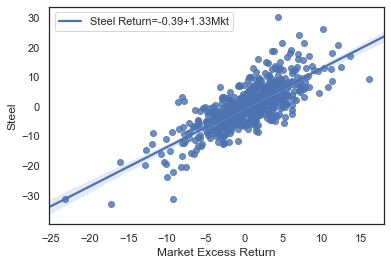

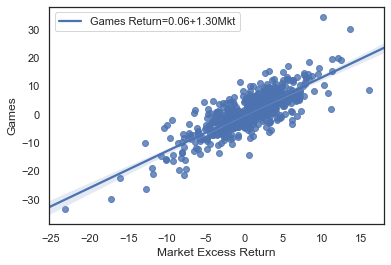

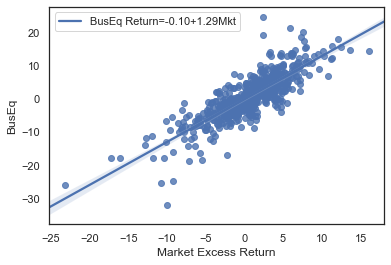

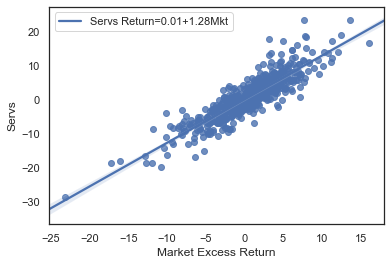

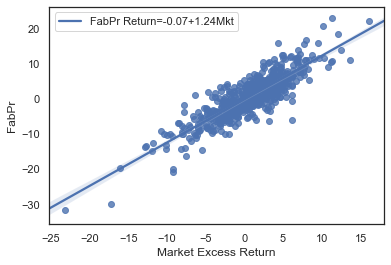

In [15]:
sns.set(style="white", color_codes=True)

for t in top_inds:
    intercept, slope = sm.OLS(inds_ex[t],sm.add_constant(mktrf["Mkt-RF"])).fit().params
    txt = t
    sns.regplot(x=mktrf['Mkt-RF'], y=inds_ex[t],line_kws={'label':txt + " Return={1:.2f}+{0:.2f}Mkt".format(slope,intercept)}).set(xlabel='Market Excess Return')
    plt.legend()
    plt.show()

## Bottom 5 industries

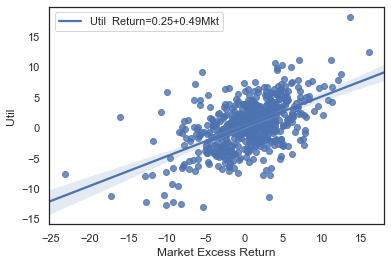

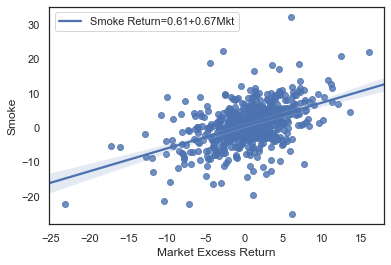

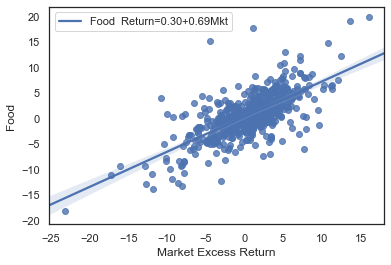

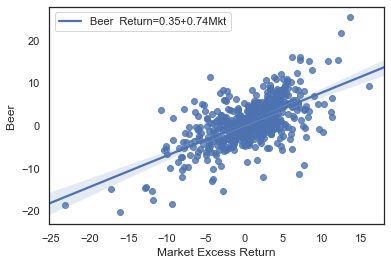

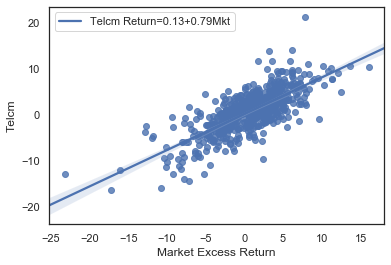

In [16]:
sns.set(style="white", color_codes=True)

for t in bottom_inds:
    intercept, slope = sm.OLS(inds_ex[t],sm.add_constant(mktrf["Mkt-RF"])).fit().params
    txt = t
    sns.regplot(x=mktrf['Mkt-RF'], y=inds_ex[t],line_kws={'label':txt + " Return={1:.2f}+{0:.2f}Mkt".format(slope,intercept)}).set(xlabel='Market Excess Return')
    plt.legend()
    plt.show()

## Alpha against Beta

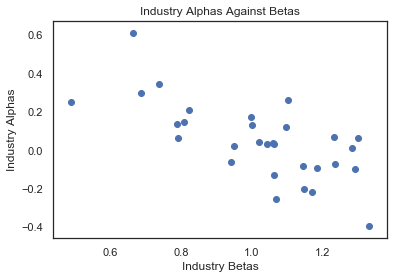

In [17]:
plt.scatter(y = coefs['alpha'],x = coefs['beta'])
plt.title('Industry Alphas Against Betas')
plt.xlabel('Industry Betas')
plt.ylabel('Industry Alphas')
plt.show()

## Cyclical and Defensive Sector Indexes

In [18]:
ind_names = list(inds_ex.columns)
top_inds = []
column_names = list(inds_ex.columns)
weights_top = pd.DataFrame(0, index = np.arange(inds_ex.shape[0]-120),columns = column_names)
weights_bottom = pd.DataFrame(0, index = np.arange(inds_ex.shape[0]-120),columns = column_names)
for t in range(0,inds_ex.shape[0]-120):
    inds_temp = inds_ex[t:t+120]
    mktrf_temp = mktrf[t:t+120]
    mkt_reg_alphas = []
    mkt_reg_betas = []
    for column in inds_temp:
        mkt_reg_alphas.append(sm.OLS(inds_temp[column],sm.add_constant(mktrf_temp["Mkt-RF"])).fit().params[0])
        mkt_reg_betas.append(sm.OLS(inds_temp[column],sm.add_constant(mktrf_temp["Mkt-RF"])).fit().params[1])
    coefs = pd.DataFrame({'Industry' : ind_names,'alpha' : mkt_reg_alphas,'beta' : mkt_reg_betas})
    top_names = np.array(coefs.sort_values(by=['beta'],ascending=False)[0:5].Industry)
    bottom_names = np.array(coefs.sort_values(by=['beta'],ascending=True)[0:5].Industry)
    weights_top.loc[t,top_names] = 0.2
    weights_bottom.loc[t,bottom_names] = 0.2

In [19]:
#checking if weights sum to 1
weights_bottom.sum(axis = 1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
463    1.0
464    1.0
465    1.0
466    1.0
467    1.0
Length: 468, dtype: float64

In [20]:
exrets = inds_ex['1981-01-01':'2019-12-01']
weights_top = weights_top.set_index(exrets.index)
weights_bottom = weights_bottom.set_index(exrets.index)

In [21]:
exrets.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Data,,,,,,,,,,,,,,,,,,,,,
1981-01-01,1.27,3.52,-2.11,-5.16,-2.19,-2.03,6.78,-2.61,-0.25,6.30,...,4.49,-2.97,-9.27,0.00,1.17,-4.12,-0.58,0.04,-3.54,-4.37
1981-02-01,1.21,2.10,2.20,2.58,1.36,7.88,1.39,0.78,2.82,0.14,...,1.08,-0.31,-0.55,7.13,0.98,-2.42,2.15,7.69,0.90,0.03
1981-03-01,5.73,6.75,4.23,12.32,6.84,1.77,7.52,4.66,1.37,3.56,...,-0.05,8.37,3.52,4.03,10.55,11.83,12.29,7.51,5.65,4.64
1981-04-01,-1.05,-3.13,-0.07,0.99,4.44,-1.57,-4.35,1.92,-3.42,9.57,...,5.13,3.26,-1.17,-3.95,0.89,-2.48,3.15,3.69,-0.47,1.79
1981-05-01,1.59,0.13,0.74,4.93,3.72,-1.33,0.52,2.32,-2.52,-0.53,...,5.99,1.82,3.10,-1.08,4.13,0.82,1.42,1.34,1.61,1.45


In [22]:
#getting excess returns of cyclical and defensive portfolios
exrets_top = exrets.multiply(weights_top)
exrets_bottom = exrets.multiply(weights_bottom)

In [23]:
#cyclical and defensive portfolio returns
rets_top = exrets_top.sum(axis = 1)
rets_bottom = exrets_bottom.sum(axis = 1)
print(rets_top)
print(rets_bottom)

Data
1981-01-01   -5.164
1981-02-01    0.696
1981-03-01    6.604
1981-04-01    0.058
1981-05-01    1.018
              ...  
2019-08-01   -8.386
2019-09-01    3.218
2019-10-01    1.548
2019-11-01    1.092
2019-12-01    2.328
Length: 468, dtype: float64
Data
1981-01-01   -0.458
1981-02-01    1.570
1981-03-01    3.662
1981-04-01    0.180
1981-05-01    2.324
              ...  
2019-08-01    0.112
2019-09-01    1.768
2019-10-01    0.508
2019-11-01    0.594
2019-12-01    2.814
Length: 468, dtype: float64


### Average Annualized Excess Returns

In [24]:
print("Cyclical Sector Index: ",rets_top.mean()*12)
print("Defensive Sector Index: ",rets_bottom.mean()*12)

Cyclical Sector Index:  6.11948717948718
Defensive Sector Index:  9.883076923076926


### Market Alphas and Betas

In [25]:
mktrf2 = mktrf['1981-01-01':'2019-12-01']
mkt_exret = mktrf2["Mkt-RF"]
print("Cyclical Sector Index: ",sm.OLS(rets_top,sm.add_constant(mkt_exret)).fit().params)
print("Defensive Sector Index: ",sm.OLS(rets_bottom,sm.add_constant(mkt_exret)).fit().params)

Cyclical Sector Index:  const    -0.332724
Mkt-RF    1.289944
dtype: float64
Defensive Sector Index:  const     0.426281
Mkt-RF    0.608185
dtype: float64


### Annualized Sharpe Ratios

In [26]:
print("Cyclical Sector Index: ",rets_top.mean()/rets_top.std()*math.sqrt(12))
print("Defensive Sector Index: ",rets_bottom.mean()/rets_bottom.std()*math.sqrt(12))

Cyclical Sector Index:  0.2857737754557813
Defensive Sector Index:  0.7701573482886503


### Annualized Information Ratios

In [27]:
te_top = (rets_top-mkt_exret).std()
te_bottom = (rets_bottom-mkt_exret).std()
IR_top = (rets_top.mean()-mkt_exret.mean())/te_top
IR_bottom = (rets_bottom.mean()-mkt_exret.mean())/te_bottom
print("Cyclical Sector Index: ",IR_top*math.sqrt(12))
print("Defensive Sector Index: ",IR_bottom*math.sqrt(12))

Cyclical Sector Index:  -0.173530620504669
Defensive Sector Index:  0.19032045247968146


In [28]:
#calculating cumulative returns for both indexes
cumrets_top = np.cumprod(rets_top/100+1)
cumrets_bottom = np.cumprod(rets_bottom/100+1)

### Maximum Drawdown

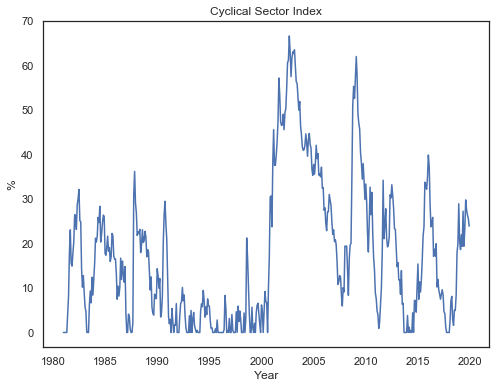

Max Drawdown of Cyclical Sector Index 66.69307821678878


In [40]:
max_val = 0
drawdown_top = []
for i in range(0,rets_top.shape[0]):
    if cumrets_top[i] > max_val:
        max_val = cumrets_top[i]
    drawdown_top.append((max_val - cumrets_top[i])/max_val)

drawdown_top = pd.DataFrame(drawdown_top).set_index(cumrets_top.index)
plt.figure(figsize=(8,6))
plt.plot(drawdown_top*100)
plt.xlabel("Year")
plt.ylabel("%")
plt.title("Cyclical Sector Index")
plt.show()

print("Max Drawdown of Cyclical Sector Index",drawdown_top[0].max()*100)

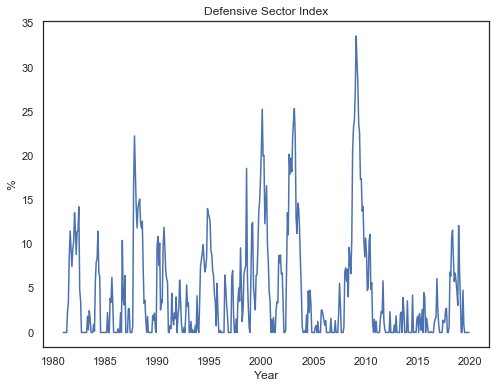

Max Drawdown of Defensive Sector Index 33.569211986851236


In [39]:
max_val = 0
drawdown_bottom = []
for i in range(0,rets_bottom.shape[0]):
    if cumrets_bottom[i] > max_val:
        max_val = cumrets_bottom[i]
    drawdown_bottom.append((max_val - cumrets_bottom[i])/max_val)

drawdown_bottom = pd.DataFrame(drawdown_bottom).set_index(cumrets_bottom.index)
plt.figure(figsize=(8,6))
plt.plot(drawdown_bottom*100)
plt.xlabel("Year")
plt.ylabel("%")
plt.title("Defensive Sector Index")
plt.show()

print("Max Drawdown of Defensive Sector Index",drawdown_bottom[0].max()*100)

In [46]:
#Industries that were in the Cyclical Sector index
weights_top.columns[weights_top.sum(axis = 0) != 0]

Index(['Games', 'Clths', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos',
       'Carry', 'Mines', 'Coal ', 'Servs', 'BusEq', 'Whlsl', 'Rtail', 'Meals',
       'Fin  ', 'Other'],
      dtype='object')

In [47]:
#Industries that were in the Defensive Sector index
weights_bottom.columns[weights_bottom.sum(axis = 0) != 0]

Index(['Food ', 'Beer ', 'Smoke', 'Hshld', 'Hlth ', 'Txtls', 'Autos', 'Mines',
       'Coal ', 'Oil  ', 'Util ', 'Telcm'],
      dtype='object')

In [48]:
exrets.columns[(weights_top.sum(axis = 0) != 0) & (weights_bottom.sum(axis = 0) != 0)]

Index(['Txtls', 'Autos', 'Mines', 'Coal '], dtype='object')

### AR(1) model on training set

In [49]:
rets_top = pd.DataFrame(rets_top, columns = ["ret"])
rets_bottom = pd.DataFrame(rets_bottom, columns = ["ret"])

In [50]:
#creating the lagged returns variable
rets_top['lag_ret'] = rets_top['ret'].shift(1)
rets_top = rets_top.iloc[1:,:]
rets_bottom['lag_ret'] = rets_bottom['ret'].shift(1)
rets_bottom = rets_bottom.iloc[1:,:]

In [51]:
#cutting the data into training and testing sets
train_top,test_top = rets_top['1981-01-01':'2013-12-01'],rets_top['2014-01-01':'2019-12-01']
train_bottom,test_bottom = rets_bottom['1981-01-01':'2013-12-01'],rets_bottom['2014-01-01':'2019-12-01']

In [64]:
reg_top = sm.OLS(train_top['ret'],sm.add_constant(train_top['lag_ret'])).fit()
print(reg_top.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.341
Date:                Tue, 03 Mar 2020   Prob (F-statistic):              0.127
Time:                        00:47:05   Log-Likelihood:                -1285.5
No. Observations:                 395   AIC:                             2575.
Df Residuals:                     393   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5641      0.318      1.777      0.0

In [53]:
reg_bottom = sm.OLS(train_bottom['ret'],sm.add_constant(train_bottom['lag_ret'])).fit()
print(reg_bottom.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1083
Date:                Tue, 03 Mar 2020   Prob (F-statistic):              0.742
Time:                        00:23:29   Log-Likelihood:                -1089.9
No. Observations:                 395   AIC:                             2184.
Df Residuals:                     393   BIC:                             2192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8213      0.197      4.164      0.0

In [54]:
#creating independent and dependent variables for the test set
x_test_top, y_test_top = test_top['lag_ret'], test_top['ret']
x_test_bottom, y_test_bottom = test_bottom['lag_ret'],test_bottom['ret']

In [55]:
#predicting returns for the testing period: cyclical
x_test_top = sm.add_constant(x_test_top)
preds_top = reg_top.predict(x_test_top)

In [56]:
#predicting returns for the testing period: defensive
x_test_bottom = sm.add_constant(x_test_bottom)
preds_bottom = reg_bottom.predict(x_test_bottom)

### One-month ahead excess returns and variances

In [57]:
mu_top = preds_top/100
mu_bottom = preds_bottom/100
var_top = stat.variance(reg_top.resid/100)
var_bottom = stat.variance(reg_bottom.resid/100)
print("Cyclical Sector Index: ",var_top*100)
print("Defensive Sector Index: ",var_bottom*100)

Cyclical Sector Index:  0.39380717359018935
Defensive Sector Index:  0.146334948901861


In [58]:
cov_tb = np.cov(reg_top.resid/100,reg_bottom.resid/100)[0][1]
print("Covariance between portfolio returns: ",cov_tb*100)

Covariance between portfolio returns:  0.1434176880333201


### Cumulative portfolio returns

In [59]:
alpha = 1
w_top = ((alpha*(cov_tb-var_bottom))+mu_bottom-mu_top)/(alpha*(2*cov_tb - var_bottom-var_top))
w_bottom = (1-w_top)
port_rets = w_top*y_test_top+w_bottom*y_test_bottom
cum_port_rets = np.cumprod(1+port_rets/100)

Text(0.5, 1.0, 'Returns of the Portfolio with Alpha = 1')

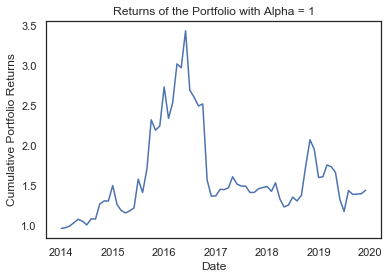

In [60]:
plt.plot(cum_port_rets)
plt.xlabel("Date")
plt.ylabel("Cumulative Portfolio Returns")
plt.title("Returns of the Portfolio with Alpha = 1")

In [61]:
alpha = 10
w_top = ((alpha*(cov_tb-var_bottom))+mu_bottom-mu_top)/(alpha*(2*cov_tb - var_bottom-var_top))
w_bottom = (1-w_top)
port_rets = w_top*y_test_top+w_bottom*y_test_bottom
cum_port_rets = np.cumprod(1+port_rets/100)

Text(0.5, 1.0, 'Returns of the Portfolio with Alpha = 10')

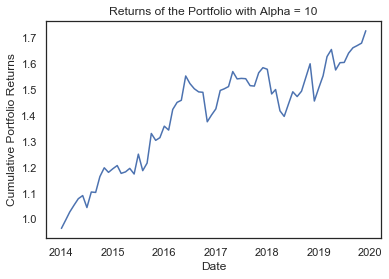

In [62]:
plt.plot(cum_port_rets)
plt.xlabel("Date")
plt.ylabel("Cumulative Portfolio Returns")
plt.title("Returns of the Portfolio with Alpha = 10")